In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

https://archive.ics.uci.edu/dataset/602/dry+bean+dataset

In [2]:
data = pd.read_excel("Dry_Bean_Dataset.xlsx")

In [3]:
data.head(10)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
5,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,SEKER
6,30477,670.033,211.050155,184.039050,1.146768,0.489478,30970,196.988633,0.762402,0.984081,0.853080,0.933374,0.006925,0.003242,0.871186,0.999049,SEKER
7,30519,629.727,212.996755,182.737204,1.165591,0.513760,30847,197.124320,0.770682,0.989367,0.967109,0.925480,0.006979,0.003158,0.856514,0.998345,SEKER
8,30685,635.681,213.534145,183.157146,1.165852,0.514081,31044,197.659696,0.771561,0.988436,0.954240,0.925658,0.006959,0.003152,0.856844,0.998953,SEKER
9,30834,631.934,217.227813,180.897469,1.200834,0.553642,31120,198.139012,0.783683,0.990810,0.970278,0.912125,0.007045,0.003008,0.831973,0.999061,SEKER


In [4]:
data.shape

(13611, 17)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [6]:
data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [7]:
data.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [8]:
data.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

In [9]:
Outliers = {}
for col in data.select_dtypes(include=['int64','float64']).columns:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)

    iqr = q3-q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    olr = data[(data[col]<lower) | (data[col]>upper)][col]
    Outliers[col] = olr

for col, values in Outliers.items():
    if(len(values)==0):
        print(f"{col}: No Outlier")
    else:
        print(f"{col}: Outliers Present ({len(values)})")
    

Area: Outliers Present (551)
Perimeter: Outliers Present (500)
MajorAxisLength: Outliers Present (379)
MinorAxisLength: Outliers Present (569)
AspectRation: Outliers Present (473)
Eccentricity: Outliers Present (843)
ConvexArea: Outliers Present (550)
EquivDiameter: Outliers Present (526)
Extent: Outliers Present (275)
Solidity: Outliers Present (778)
roundness: Outliers Present (91)
Compactness: Outliers Present (109)
ShapeFactor1: Outliers Present (533)
ShapeFactor2: No Outlier
ShapeFactor3: Outliers Present (195)
ShapeFactor4: Outliers Present (767)


In [10]:
data.head(10)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
5,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,SEKER
6,30477,670.033,211.050155,184.039050,1.146768,0.489478,30970,196.988633,0.762402,0.984081,0.853080,0.933374,0.006925,0.003242,0.871186,0.999049,SEKER
7,30519,629.727,212.996755,182.737204,1.165591,0.513760,30847,197.124320,0.770682,0.989367,0.967109,0.925480,0.006979,0.003158,0.856514,0.998345,SEKER
8,30685,635.681,213.534145,183.157146,1.165852,0.514081,31044,197.659696,0.771561,0.988436,0.954240,0.925658,0.006959,0.003152,0.856844,0.998953,SEKER
9,30834,631.934,217.227813,180.897469,1.200834,0.553642,31120,198.139012,0.783683,0.990810,0.970278,0.912125,0.007045,0.003008,0.831973,0.999061,SEKER


# Visualization

In [11]:
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (8,5)

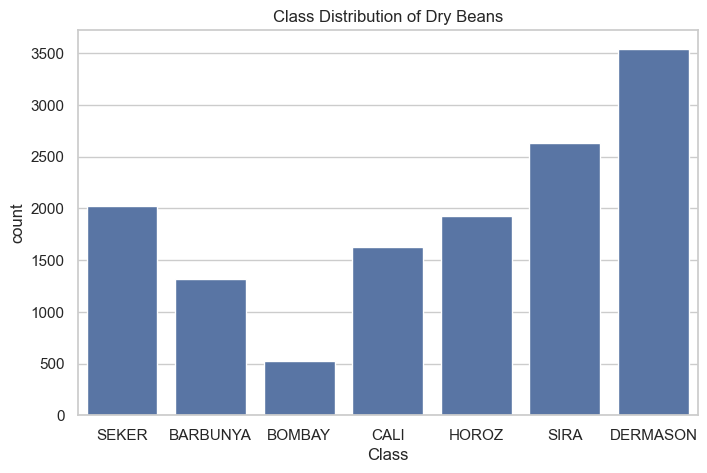

In [12]:
#How is the class distribution of dry beans spread across the dataset
plt.figure()
sns.countplot(x='Class', data=data)
plt.title("Class Distribution of Dry Beans")
plt.show()

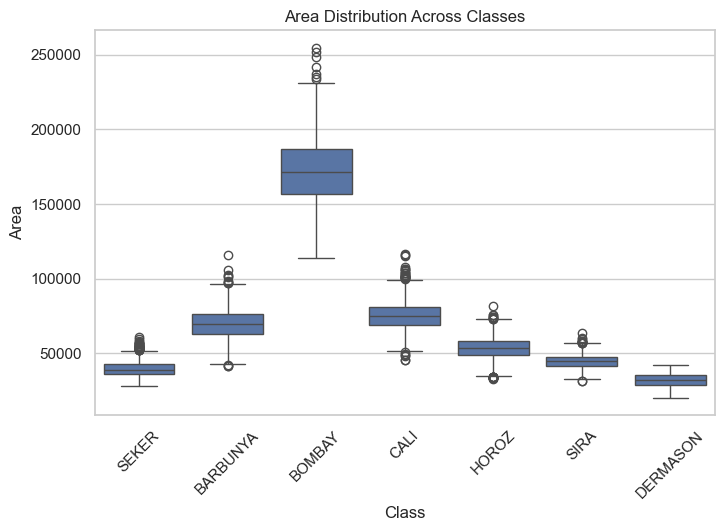

In [13]:
#How does the Area vary across different bean classes
plt.figure()
sns.boxplot(x='Class', y='Area', data=data)
plt.title("Area Distribution Across Classes")
plt.xticks(rotation=45)
plt.show()


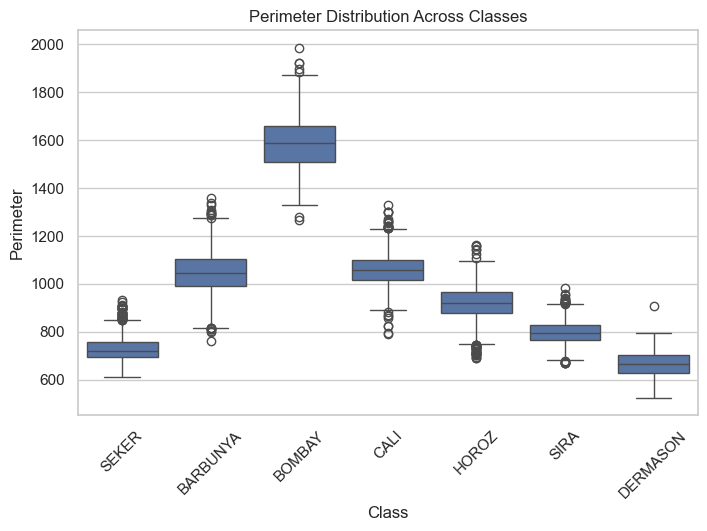

In [14]:
#What is the distribution of Perimeter for each bean class
plt.figure()
sns.boxplot(x='Class', y='Perimeter', data=data)
plt.title("Perimeter Distribution Across Classes")
plt.xticks(rotation=45)
plt.show()


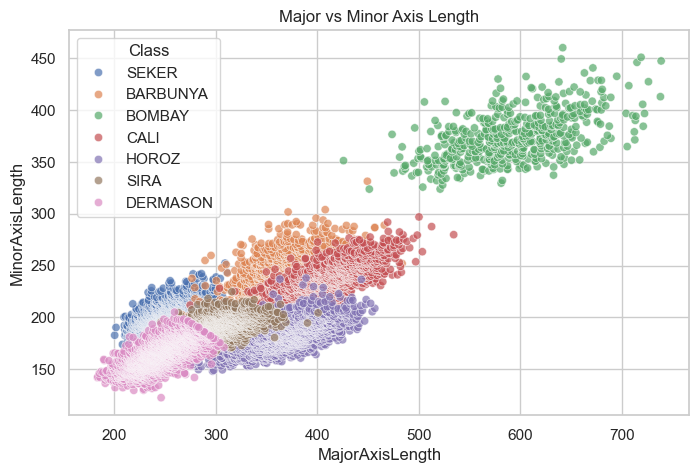

In [15]:
#How do MajorAxisLength and MinorAxisLength jointly differentiate bean classes?
plt.figure()
sns.scatterplot(
    x='MajorAxisLength',
    y='MinorAxisLength',
    hue='Class',
    data=data,
    alpha=0.7
)
plt.title("Major vs Minor Axis Length")
plt.show()


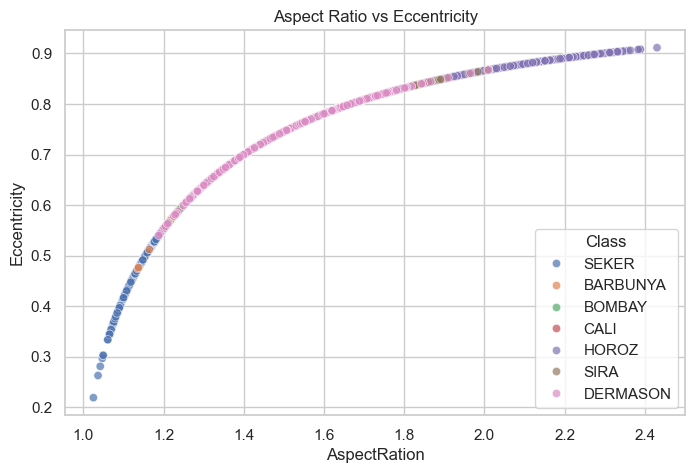

In [16]:
#What is the relationship between AspectRatio and Eccentricity across classes?
plt.figure()
sns.scatterplot(
    x='AspectRation',
    y='Eccentricity',
    hue='Class',
    data=data,
    alpha=0.7
)
plt.title("Aspect Ratio vs Eccentricity")
plt.show()


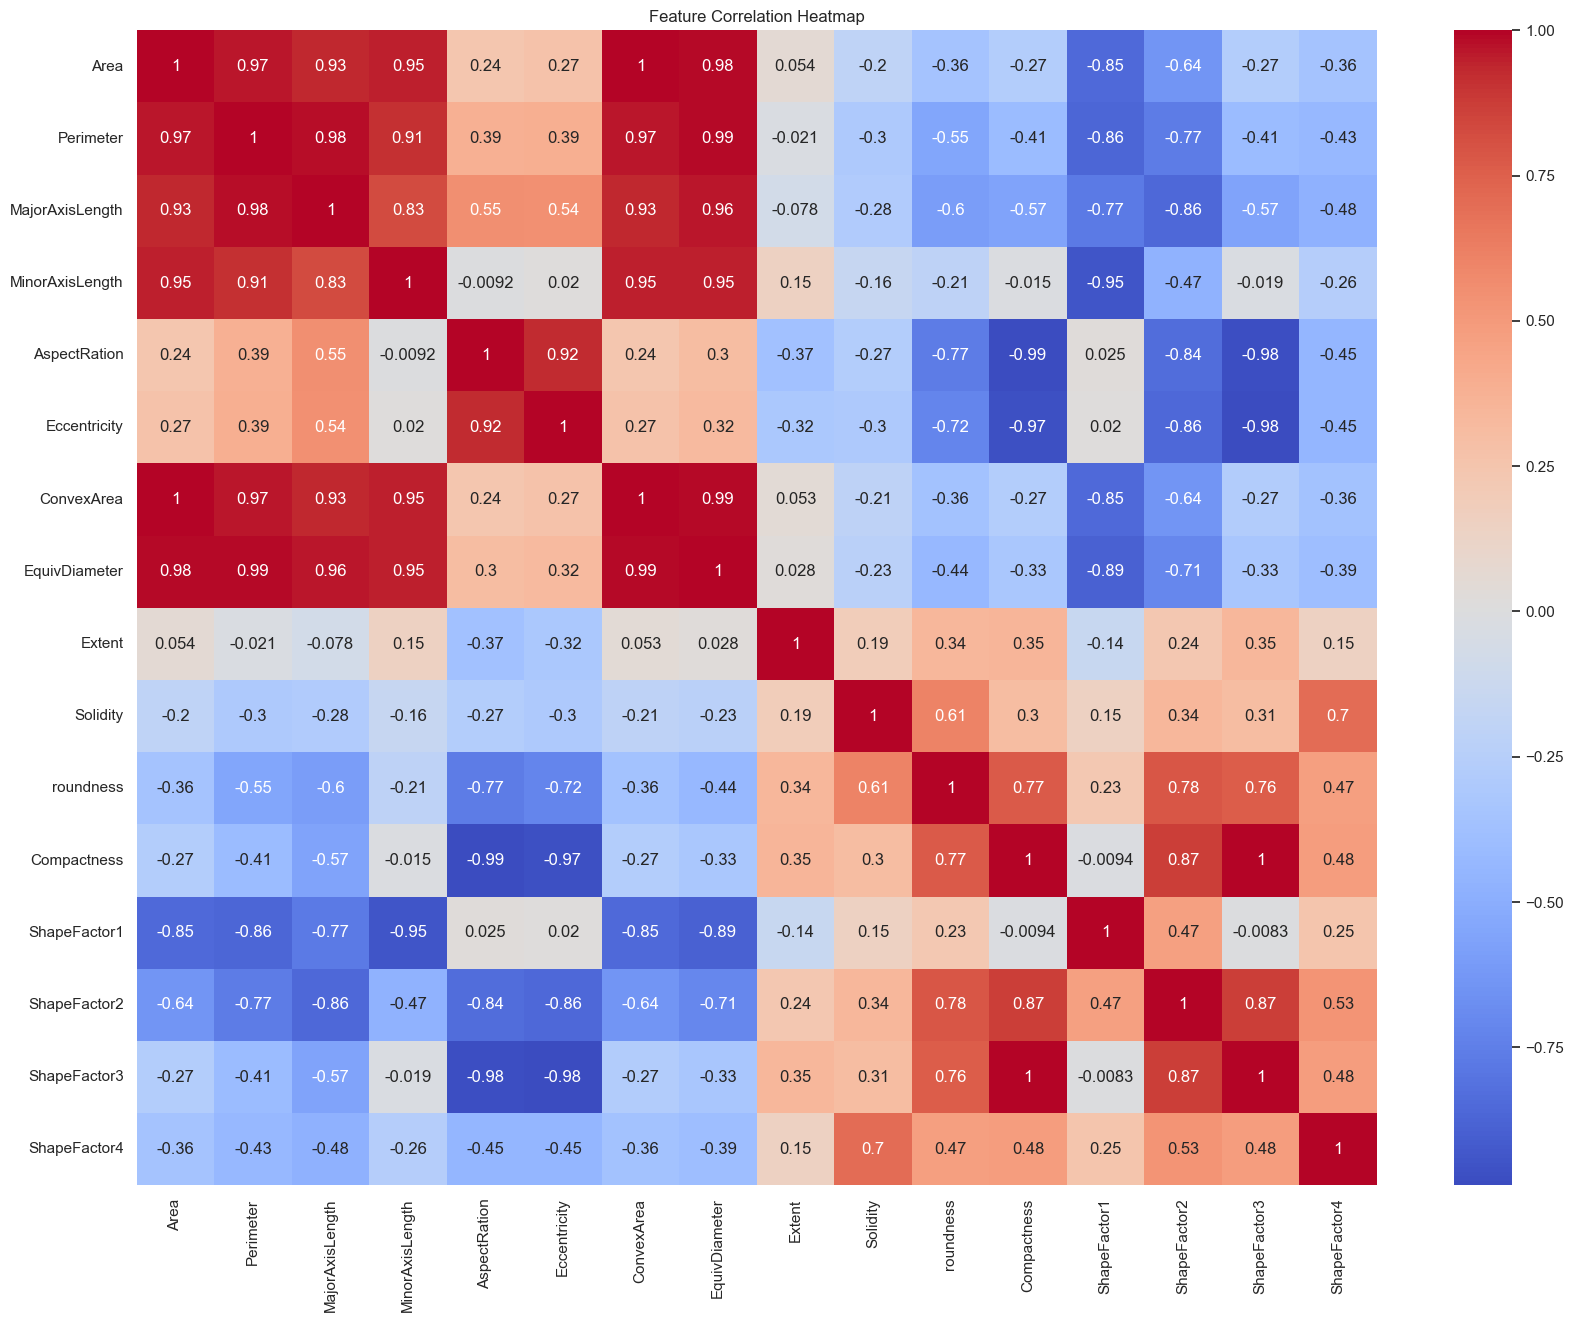

In [17]:
#How correlated are the numerical features with each other?
plt.figure(figsize=(20,15))
corr = data.select_dtypes(include=['int64','float64']).corr()

sns.heatmap(
    corr,
    cmap='coolwarm',
    annot=True
)
plt.title("Feature Correlation Heatmap")
plt.show()


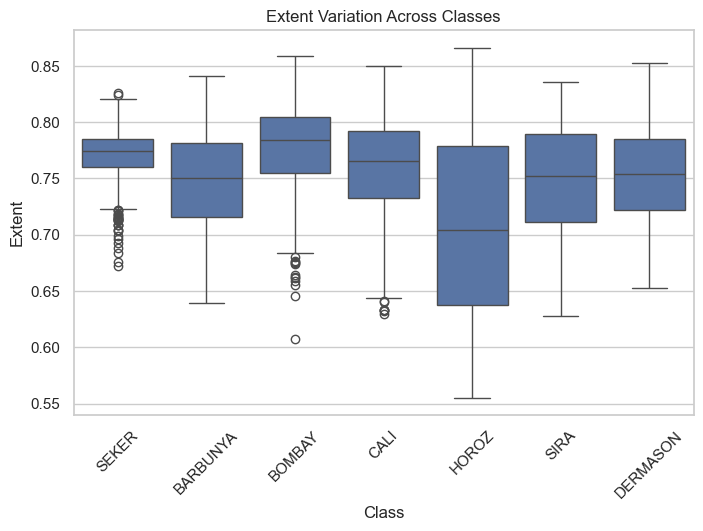

In [18]:
#Which features show the most variation between classes
plt.figure()
sns.boxplot(x='Class', y='Extent', data=data)
plt.title("Extent Variation Across Classes")
plt.xticks(rotation=45)
plt.show()


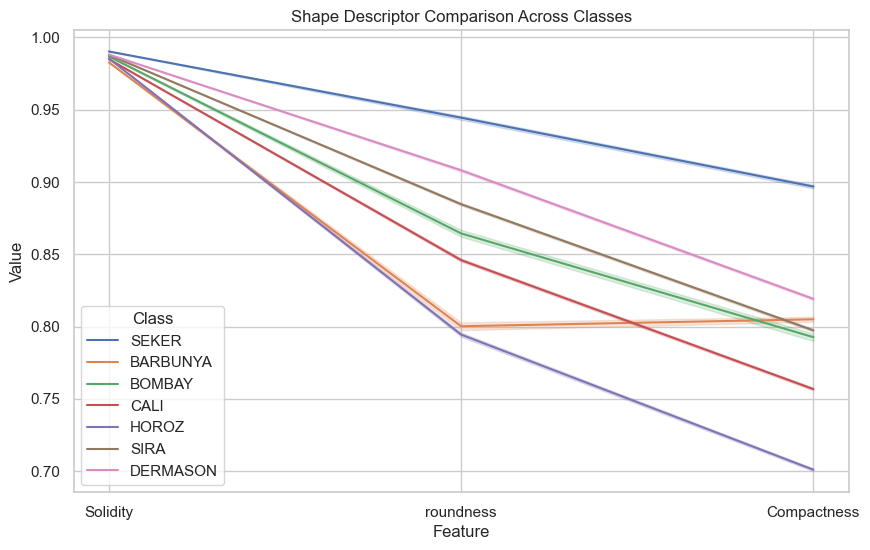

In [19]:
#Do shape descriptors like Solidity, Roundness, and Compactness help distinguish classes?
shape_features = ['Solidity', 'roundness', 'Compactness']

data_melted = data.melt(
    id_vars='Class',
    value_vars=shape_features,
    var_name='Feature',
    value_name='Value'
)

plt.figure(figsize=(10,6))
sns.lineplot(x='Feature', y='Value', hue='Class', data=data_melted)
plt.title("Shape Descriptor Comparison Across Classes")
plt.show()


# Model creation

In [20]:
label = LabelEncoder()
data['Class'] = label.fit_transform(data['Class'])

In [21]:
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5


In [22]:
x = data.drop("Class",axis=1)
y = data['Class']


In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [25]:
x

array([[-0.84074853, -1.1433189 , -1.30659814, ...,  2.40217287,
         1.92572347,  0.83837103],
       [-0.82918764, -1.01392388, -1.39591111, ...,  3.10089314,
         2.68970162,  0.77113842],
       [-0.80715717, -1.07882906, -1.25235661, ...,  2.23509147,
         1.84135576,  0.91675514],
       ...,
       [-0.37203825, -0.44783294, -0.45047814, ...,  0.28920441,
         0.33632829,  0.39025114],
       [-0.37176543, -0.42702856, -0.42897404, ...,  0.22837538,
         0.2489734 ,  0.03644001],
       [-0.37135619, -0.38755718, -0.2917356 , ..., -0.12777587,
        -0.2764814 ,  0.71371948]], shape=(13611, 16))

In [26]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42)


# Logistic Regression Model

In [27]:
model= LogisticRegression()

In [28]:
model.fit(xtrain, ytrain)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [29]:
ypred_logi = model.predict(xtest)


In [30]:
accLog = accuracy_score(ytest,ypred_logi)
print("accuracy_score:",accLog)

accuracy_score: 0.9269188395152406


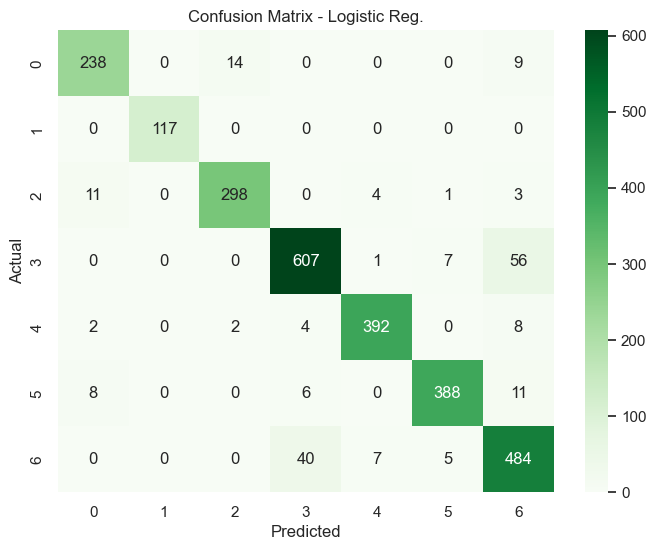

In [31]:
cmLogi = confusion_matrix(ytest, ypred_logi)

plt.figure(figsize=(8,6))
sns.heatmap(cmLogi, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Logistic Reg.")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [32]:
print("Classifiation report for Logistic Regression\n")
print(classification_report(ytest,ypred_logi))

Classifiation report for Logistic Regression

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       261
           1       1.00      1.00      1.00       117
           2       0.95      0.94      0.94       317
           3       0.92      0.90      0.91       671
           4       0.97      0.96      0.97       408
           5       0.97      0.94      0.95       413
           6       0.85      0.90      0.87       536

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



# SVM Model

In [33]:
from sklearn.svm import SVC

In [34]:
svmodel = SVC(kernel='rbf',C=1.0,gamma='scale',class_weight='balanced',random_state=42)

In [35]:
svmodel.fit(xtrain, ytrain)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,'balanced'
,verbose,False


In [36]:
ypred_svm = svmodel.predict(xtest)

In [37]:
accSvm = accuracy_score(ytest, ypred_svm)
print("accuracy_score:",accSvm)

accuracy_score: 0.9316929856775615


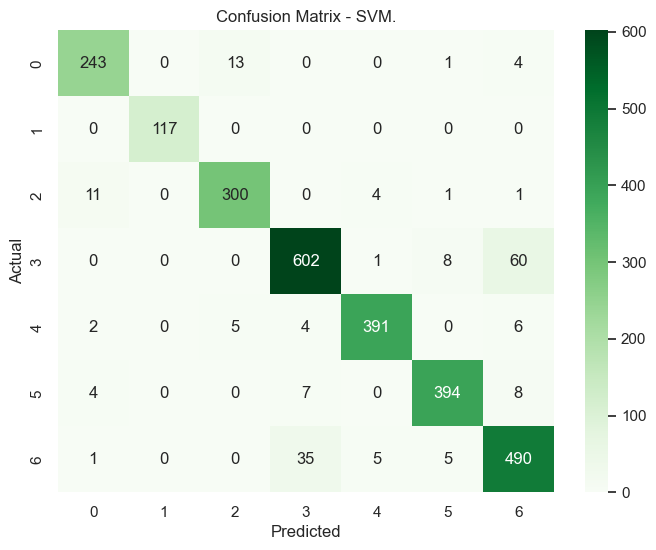

In [38]:
cmsvm = confusion_matrix(ytest, ypred_svm)

plt.figure(figsize=(8,6))
sns.heatmap(cmsvm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - SVM.")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [39]:
print("Classifiation report for SVM\n")
print(classification_report(ytest,ypred_svm))

Classifiation report for SVM

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       261
           1       1.00      1.00      1.00       117
           2       0.94      0.95      0.94       317
           3       0.93      0.90      0.91       671
           4       0.98      0.96      0.97       408
           5       0.96      0.95      0.96       413
           6       0.86      0.91      0.89       536

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



# Decision Tree Model

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=42)

In [42]:
dt.fit(xtrain, ytrain)

,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [43]:
ypred_dt = dt.predict(xtest)

In [44]:
accDt = accuracy_score(ytest,ypred_dt)
print("Accuracy Score:",accDt)


Accuracy Score: 0.8027910392948954


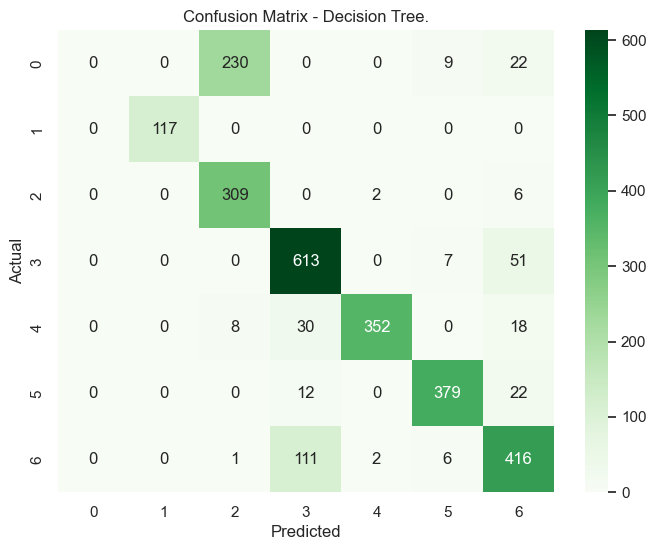

In [45]:
cmdt = confusion_matrix(ytest, ypred_dt)

plt.figure(figsize=(8,6))
sns.heatmap(cmdt, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Decision Tree.")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [46]:
print("Classifiation report for Decision Tree\n")
print(classification_report(ytest,ypred_dt))

Classifiation report for Decision Tree

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       261
           1       1.00      1.00      1.00       117
           2       0.56      0.97      0.71       317
           3       0.80      0.91      0.85       671
           4       0.99      0.86      0.92       408
           5       0.95      0.92      0.93       413
           6       0.78      0.78      0.78       536

    accuracy                           0.80      2723
   macro avg       0.73      0.78      0.74      2723
weighted avg       0.75      0.80      0.77      2723



c:\Users\ABHISHEK\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ABHISHEK\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\ABHISHEK\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _war

# Naive Bayes Model

In [47]:
from sklearn.naive_bayes import GaussianNB

In [48]:
gb = GaussianNB()
gb.fit(xtrain,ytrain)

,priors,None
,var_smoothing,1e-09


In [49]:
ypred_gb = gb.predict(xtest)

In [50]:
accGb  = accuracy_score(ytest, ypred_gb)
print("Accuracy:",accGb)

Accuracy: 0.9037825927286082


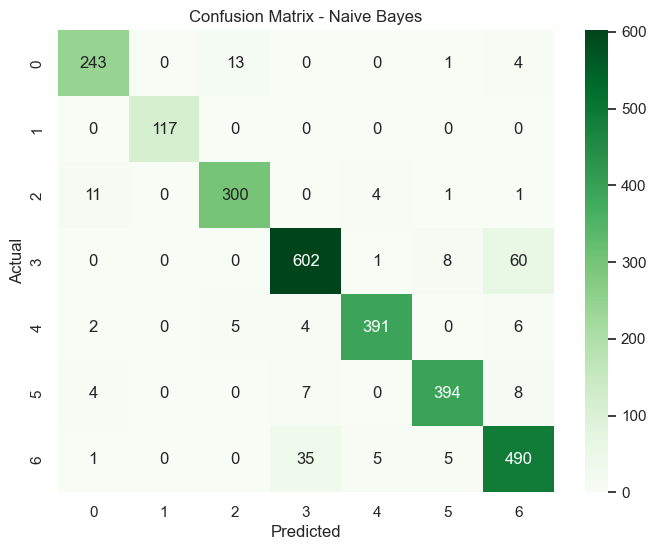

In [51]:
cmgb = confusion_matrix(ytest, ypred_svm)

plt.figure(figsize=(8,6))
sns.heatmap(cmgb, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [52]:
print("Classifiation report for Naive Bayes\n")
print(classification_report(ytest,ypred_gb))

Classifiation report for Naive Bayes

              precision    recall  f1-score   support

           0       0.84      0.81      0.83       261
           1       1.00      1.00      1.00       117
           2       0.87      0.90      0.88       317
           3       0.93      0.87      0.90       671
           4       0.96      0.96      0.96       408
           5       0.94      0.95      0.95       413
           6       0.83      0.90      0.86       536

    accuracy                           0.90      2723
   macro avg       0.91      0.91      0.91      2723
weighted avg       0.91      0.90      0.90      2723

